<a href="https://colab.research.google.com/github/derewor/Housing_data/blob/main/Housing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all required libraries

In [15]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# read the housing csv file stored in the computer
df = pd.read_csv('/content/sample_data/Housing.csv')

In [21]:
# look at the columns by printing the head 2 rows
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [33]:
df['view'].unique()

array([0, 3, 4, 2, 1])

In [38]:
mean_price_per_bedrooms = df.groupby(['bedrooms', 'view'])['price'].mean()
mean_price_per_bedrooms

bedrooms  view
0         0       3.498682e+05
          2       7.375000e+05
1         0       3.047537e+05
          1       2.635000e+05
          2       3.838429e+05
          3       5.959020e+05
          4       5.081500e+05
2         0       3.823794e+05
          1       4.972489e+05
          2       5.275508e+05
          3       6.830900e+05
          4       9.834129e+05
3         0       4.363778e+05
          1       7.006029e+05
          2       7.036608e+05
          3       7.776131e+05
          4       1.372729e+06
4         0       5.885546e+05
          1       9.042205e+05
          2       8.661019e+05
          3       1.057187e+06
          4       1.464335e+06
5         0       6.888340e+05
          1       1.203189e+06
          2       1.038031e+06
          3       1.253014e+06
          4       1.920416e+06
6         0       6.606290e+05
          1       7.126667e+05
          2       9.866565e+05
          3       1.678383e+06
          4       2.250307e+06
7         0       7.781385e+05
          1       1.104667e+06
          2       1.700000e+06
          4       1.732500e+06
8         0       1.033000e+06
          3       1.970000e+06
9         0       8.939998e+05
10        0       6.550000e+05
          2       1.148000e+06
11        0       5.200000e+05
33        0       6.400000e+05
Name: price, dtype: float64

In [40]:
#correlation between price and number of bedrooms
correlation_price_bedroom = np.corrcoef(df['price'], df['bedrooms'])
correlation_price_bedroom

array([[1.        , 0.30837692],
       [0.30837692, 1.        ]])

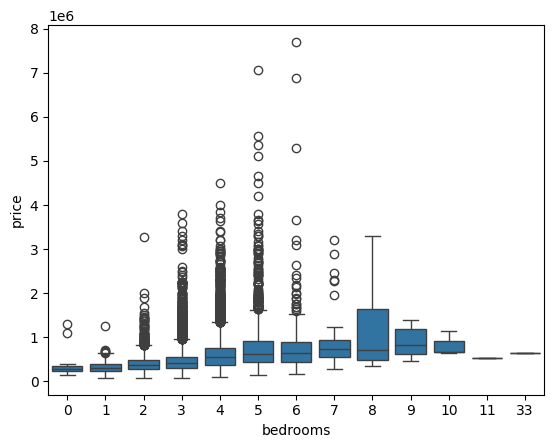

In [42]:
sns.boxplot(x='bedrooms', y='price', data=df)
plt.show()